# The Sparks Foundation GRIP Internship

## Data Science & Business Analytics Intern

### Task 1 - Prediction Using Supervised ML
    Predict the percentage of an student based on the no. of study hours.
    What will be predicted score if a student studies for 9.25 hrs/ day?

This is a simple linear regression task as it involves just 2 variables, Hours and Scores

### Author - Suresh Gedela

### 1. Read the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
student_data=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Checking for any Null values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

        No Null values in the dataset. That's good!

### 2. Visualize the Dataset

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

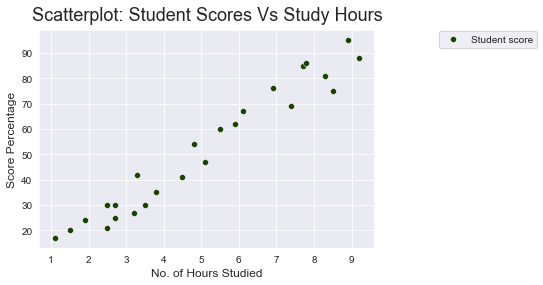

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(x= student_data['Hours'], y= student_data['Scores'], color='#1a4301', label='Student score') # To draw scatterplot
plt.title('Scatterplot: Student Scores Vs Study Hours', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.50, 1.02), ncol = 2)
plt.show()

We can observe in the above scatterplot that there seems to be some degree of positive correlation between the 2 variables. Let's confirm this.

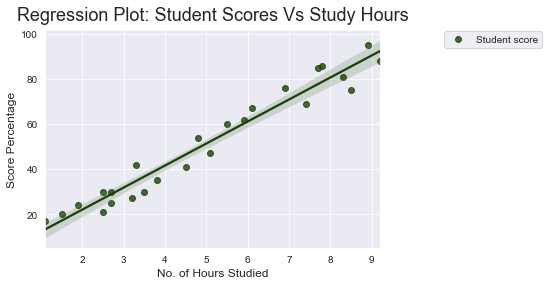

In [8]:
sns.regplot(x= student_data['Hours'], y= student_data['Scores'], color='#1a4301', label='Student score') # To draw regression plot
plt.title('Regression Plot: Student Scores Vs Study Hours', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.50, 1.02), ncol = 2)
plt.show()

The regression plot confirms that positive correlation exists between the 2 variables. Now, let's find how much they are correlated.

In [9]:
# To find the value of correlation
# By default, corr() follows the Pearson correlation method
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The 2 variables, Hours and Scores, are in high positive correlation as the correlation value is 0.976191 (0.5 < 0.976191 < 1.0).

### 3. Training the Model - Using Linear Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

As this is a linear regression problem and we have to predict the score, we take Hours to be the Feature Variable and Score to be the Target Class Label.

In [11]:
# Defining X and y from the Data
X = student_data.iloc[:, :-1].values  # All rows, except last column
y = student_data.iloc[:, 1].values # All rows, with last column

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
linreg = LinearRegression()
linreg.fit(train_X, train_y)
print("Model Trained")

Model Trained


### 4. Testing the Model - Predicting the Score Percentage

In [13]:
predicted_y = linreg.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Score': [k for k in predicted_y]})
prediction

,Hours,Predicted Score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### 5. Comparing Predicted Scores with the Actual Scores

In [14]:
compare = pd.DataFrame({'Actual Score': test_y, 'Predicted Score': predicted_y})
compare

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


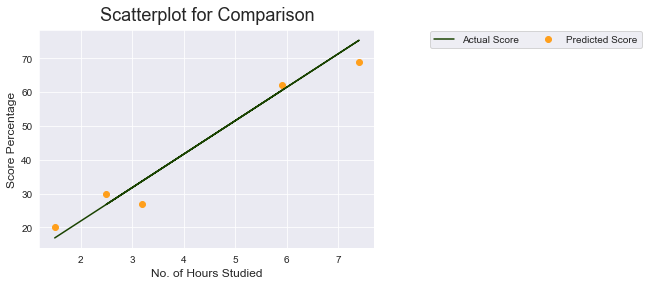

In [15]:
plt.scatter(x=test_X, y=test_y, color='#ff9f1c', label='Predicted Score') # Scatterplot
plt.plot(test_X, predicted_y, color='#1a4301', label='Actual Score') # Line of Best Fit
plt.title('Scatterplot for Comparison', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.15, 1.02), ncol = 2)
plt.show()

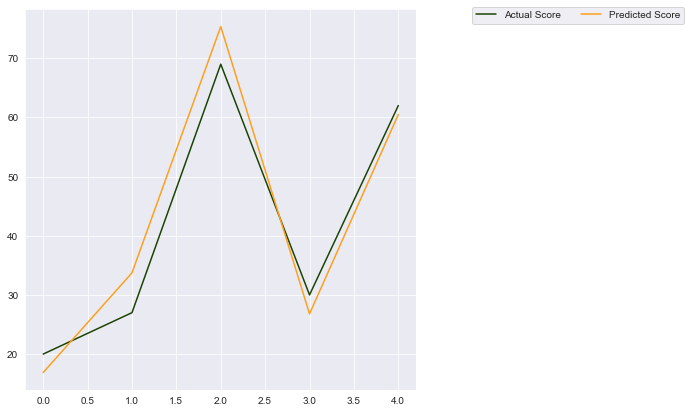

In [16]:
compare.plot(kind='line',figsize=(7,7), color=['#1a4301','#ff9f1c'])
plt.legend(bbox_to_anchor =(1.70, 1.02), ncol = 2)
plt.show()

### 6. Evaluate the Model Using Metrics

In [17]:
#MAE
print("Mean Absolute Error: ",metrics.mean_absolute_error(test_y, predicted_y))

Mean Absolute Error:  4.183859899002975


In [18]:
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))

R2 score = 0.95


## NOTES:

    The MAE value of this model is 4.183, which is fairly less. This implies that the chances of getting an error is fairly low.
    The R2 score is 0.95 which is really good!

### 7. Predicted score if a student studies for 9.25 hrs/ day - The Task

In [19]:
hours_studied = [9.25]
predicted_score = linreg.predict([hours_studied])
print("Predicted Score= {}".format(round(predicted_score[0],2)))

Predicted Score= 93.69


Therefore, the predicted score, if a student studies for 9.25 hours/day is 93.69.

# ~Thank you~